# Autolib Electric Car Sharing Service - Blue Cars

Autolib Electric Car Sharing Service Company has provided a dataset that should be used to help us understand electric car usage over time.

A claim that the mean number of bluecars taken in  different postal codes are significantly different over the weekend has been made.

I'll be investigating this claim by identifying some areas of interest via sampling then performing hypothesis testing with regards to the claim that has been made.

The following dataset has been used:
1. Autolib Dataset [http://bit.ly/DSCoreAutolibDataset]
2. Description of the dataset [http://bit.ly/DSCoreAutolibDatasetGlossary]


# Loading the Datasets

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load the datasets

autolib = pd.read_csv("/content/autolib_daily_events_postal_code.csv")
autolib



,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [0]:
description = pd.read_excel("/content/columns_explanation.xlsx")
description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


# Exploring the Data

In [0]:
# Check information about the dataset
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [0]:
# Check basic statistical data
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [0]:
# Check the datatypes of the variables in the dataset
autolib.dtypes

# The date and day_type column are categorical columns

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [0]:
# Check the number of entries in the dataset
autolib.shape

(16085, 13)

In [0]:
# Check the number of unique entries in each column
autolib.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

# Cleaning the Dataset

In [4]:
# Drop unnecessary columns

# I'll drop the columns Utilib_taken_sum, Utilib_returned_sum, Utilib_14_taken_sum and Utilib_14_returned_sum 
# as I am investigating Blue cars for this particular research question.

autolib.drop(['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum'], axis = 1, inplace = True)
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


In [5]:
# Check for missing data across the different columns

autolib.isnull().sum()

Postal code              0
date                     0
n_daily_data_points      0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
Slots_freed_sum          0
Slots_taken_sum          0
dtype: int64

In [6]:
# Check for duplicated values

autolib.duplicated().any()

False

In [7]:
# Rename the column Postal Code so as to standardize column names

autolib.rename(columns = {'Postal code': 'Postal_code'}, inplace = True)

autolib.columns

Index(['Postal_code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Slots_freed_sum',
       'Slots_taken_sum'],
      dtype='object')

In [8]:
# Check the unique values in each column
print(autolib['Postal_code'].unique())

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


In [9]:
print(autolib['date'].unique())

['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018'
 '1/31/2018' '2/1/2018' '2/2/2018' '2/3/2018' '2/4/2018' '2/5/2018'
 '2/6/2018' '2/7/2018' '2/8/2018' '2/9/2018' '2/10/2018' '2/11/2018'
 '2/12/2018' '2/13/2018' '2/14/2018' '2/15/2018' '2/16/2018' '2/17/2018'
 '2/18/2018' '2/19/2018' '2/20/2018' '2/21/2018' '2/22/2018' '2/23/2018'
 '2/24/2018' '2/28/2018' '3/1/2018' '3/2/2018' '3/3/2018' '3/4/2018'
 '3/5/2018' '3/6/2018' '3/7/2018' '3/8/2018' '3/9/2018' '3/10/2018'
 '3/11/2018' '3/12/2018' '3/13/2018' '3/14/2018' '3/15/2018' '3/16/2018'
 '3/17/2018' '3/18/2018' '3/19/2018' '3/20/2018' '3/21/2018' '3/22/2018'
 '3/23/2018' '3/24/2018' '3/25/2018' '3/26/2018' '3/27/2018' '3/28/2018'
 '3/2

In [0]:
print(autolib['n_daily_data_points'].unique())

[1440 1438 1439 1320 1437 1434 1398 1420 1425 1396 1429 1389 1380 1364
 1318 1377 1203 1417 1435 1174 1436 1411 1370]


In [0]:
print(autolib['dayOfWeek'].unique())

[0 1 2 3 4 5 6]


In [0]:
print(autolib['day_type'].unique())

['weekday' 'weekend']


In [0]:
print(autolib['BlueCars_taken_sum'].unique())

[ 110   98  138  104  114  187  180   84   81   88  125  126  224  193
  107  116  118  122  130  217  143  123  112  108  145  216  190   83
  103  146  199  186  121  113  109  207  160  115   94   99  119  176
  157   85  100  135    8   92  127  136  192  168  102  134  197  173
  131  196  150  156  231  105  219  179  124  188  139   97  120  159
  147  151  129  152  142  141  202  175   96  133  254  137  185  203
    6  166  165  243  264  213  164  163  191  276  210  183  148  270
  128  280  178  153  158  259  161  240   12  181  140  263  167  177
  250  208  171  266  155  247  154  184  293  228  182  144  218  162
  239  200  170  174  172  245    5  195  237  331  283  212  211  380
  356  233  220  238  384  313  229  221  201  350  327  223  226  234
  262  361  335  205  198  346  303  236  341  277  206   25  230  330
  286  265  251  412  340  227  357  319  189  375  326  311  284  255
  209  215  323  256  204  214  382  315  310  333  260  297  258  241
  235 

In [0]:
print(autolib['BlueCars_returned_sum'].unique())

[ 103   94  139  104  117  185  180   83   84   85  125  127  223  193
  107  116  118  122  130  217  150  113  146  218  189   81  110  147
  204  121   99  112  109  207  165  111   93  119  176  158   86   98
  135    9   91  131  137  138  208  177  124  101  145  203  169   96
  136  142  196  154  100   97  144  128  179  151  115  232  105  219
  143  190  102  159  155  156  120  141  201  133  253  199   95  108
  188  126  206  174    7  244  197  153  264  148  164  277  213  149
  175  270  198  280  161  178  152  160  257  205  240  123  157   12
  265  186  173  140  171  167  255  209  170  266  248  243  183  292
  222  134  236  132  181  172  184  168  162  237  163  233  202  283
  192  252  211    6  250  187  229  249  338  293  214  212  228  379
  359  220  225  245  400  307  221  224  367  334  274  344  340  317
  235  342  290  182  241  332  297  195  231  414  329  210  366  319
  247  376  331  322  271  328  267  377  311  281  339  305  216  258
  284 

In [0]:
print(autolib['Slots_freed_sum'].unique())

[ 22  23  27  25  18  38  34  14  15  11  19  16  21  17  41  24  20  35
  36  32  13  28  12  26   0  48  30  29  31  47  33  40  37   9  10  43
  44  49  39  42  45  51  46  59  64  56  52   1  50  95  84  83  81  58
  61  67 101  86  63  97  60  57  65  80  79  77  54  85  75  73  55   3
  62  82  71  69  74  89  91 109  70  76  72  68  78  53  66  87   2   5
 120 111  92 110  88 103 142 115 105 113 121  96  90 134 140 130  94  99
 128 100 129  98 118 106 119 117 102 107  93 135 104 122 133 108 112 116
 123 136 126   6 114 132 177 167 125 124 131 143 139 137 153 180 157 162
 152 151 149 156 145 173 147 211 127 141 161 144 163 138 171 158 148 168
 154 166 150 170 146 165 178 174 175 176 181 190 160 184 205 253 252 155
 193 204 221 214 169 197 196 200 199 191 185 183 208 159 218 215 179 216
 203 186 206   7 192 172 202 236 274 195 222 239 213 229 188 201 240 164
 226 220 182   8 194 248 289 286 234 302 254 189 235 319 277 284 360 249
 237 305 263 271 272 209 301 278 251 322 232 207 22

In [0]:
print(autolib['Slots_taken_sum'].unique())

[ 20  22  27  21  35  34  15  13  38  19  39  25  14   9  37  36  30  16
  11  28  33  18  12   0  31  23  26  50  17  40  24  48  32   8  29  42
  43  49  45  41  44  52  59  46  65  47  57  51   1  97  87  54  84  83
  60  69 103  58  62  92  67  78  82  77  53  88  72  66  99  64  55  75
 113  63  74  71  89  68  81  73  70  61  79  56  76  86   2 118 108 107
 144 114  93 105 106 115 122  90  80  98  85 139 136 128  94 126  95   4
 130 102  96 129 138 111 124 101 109 116 110 134  91 119 137 100   3 104
 112   6 177 125 120 123 131 135 140 132 155 182 154 164 121 151 157 147
 117 153 160 141 172 161   5 213 145 143 162 127 148 169 149 171 167 163
 166 133 158 159 150 174 173 178 152   7 176 179 165 180 142 188 185 183
  10 210 252 249 199 196 228 205 201 181 193 184 207 168 225 187 212 186
 146 170 203 223 197 194 230 280 202 191 200 221 218 192 156 208 175 198
 233 204 222 220 189 215 245 214 209 248 287 286 229 240 295 211 321 272
 195 226 235 216 278 359 328 247 239 330 298 260 27

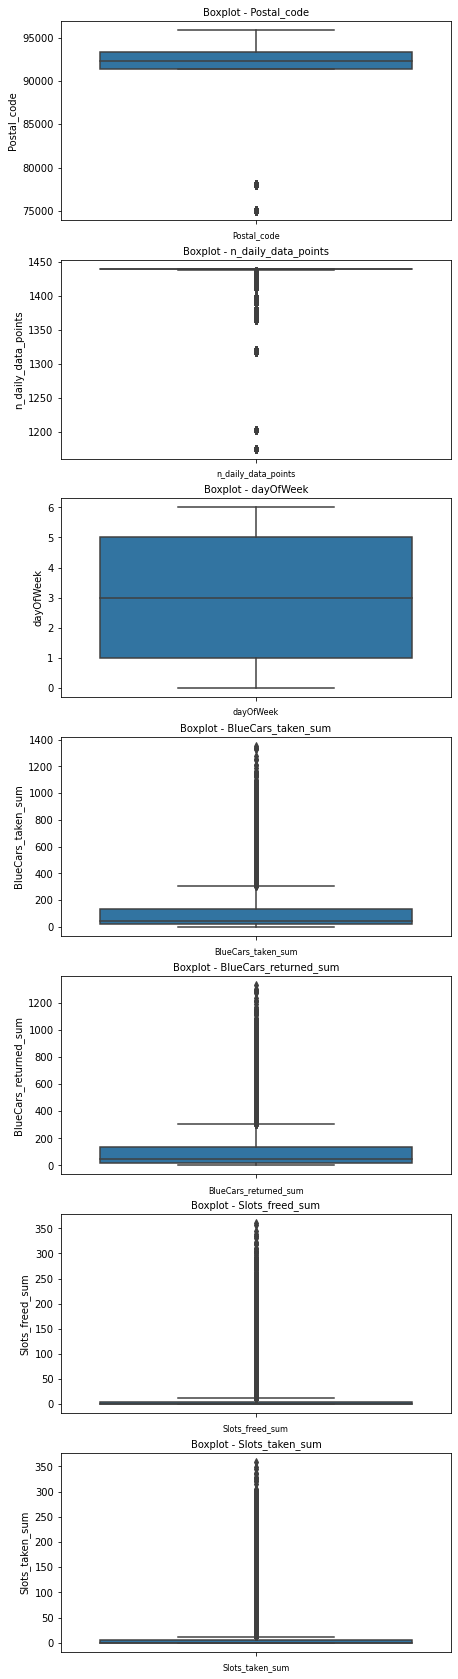

In [10]:
# Check for Outliers

column_names = ['Postal_code', 'n_daily_data_points', 'dayOfWeek', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']
fig, ax = plt.subplots(len(column_names), figsize=(7,30))

for i, col_val in enumerate(column_names):
  sns.boxplot(y = autolib[col_val], ax=ax[i])
  ax[i].set_title('Boxplot - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [11]:
# Check outliers using IQR Score

# Find the IQR Score first

Q1 = autolib.quantile(0.25)
Q3 = autolib.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Postal_code              2070.0
n_daily_data_points         1.0
dayOfWeek                   4.0
BlueCars_taken_sum        115.0
BlueCars_returned_sum     115.0
Slots_freed_sum             5.0
Slots_taken_sum             5.0
dtype: float64


In [12]:
# Multiply the (IQR) by 1.5
# Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
# Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

print(autolib < (Q1 - 1.5 * IQR)) |(autolib > (Q3 + 1.5 * IQR))

# True indicates the prescence of an outlier

       BlueCars_returned_sum  BlueCars_taken_sum  ...  day_type  n_daily_data_points
0                      False               False  ...     False                False
1                      False               False  ...     False                False
2                      False               False  ...     False                False
3                      False               False  ...     False                 True
4                      False               False  ...     False                False
...                      ...                 ...  ...       ...                  ...
16080                  False               False  ...     False                False
16081                  False               False  ...     False                False
16082                  False               False  ...     False                False
16083                  False               False  ...     False                False
16084                  False               False  ...     False  

TypeError: ignored

In [13]:
# Remove the outliers

autolib_outliers = autolib[~((autolib < (Q1 - 1.5 * IQR)) |(autolib > (Q3 + 1.5 * IQR))).any(axis=1)]
autolib_outliers.shape

(9936, 9)

In [0]:
# Export the cleaned dataset

autolib_outliers.to_csv('autolib_clean.csv')

In [41]:
autolib_clean = pd.read_csv('autolib_clean.csv')
autolib_clean.head()

,Unnamed: 0,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,3899,91330,1/1/2018,1440,0,weekday,19,9,4,2
1,3900,91330,1/2/2018,1438,1,weekday,10,10,0,0
2,3901,91330,1/3/2018,1439,2,weekday,11,13,1,1
3,3903,91330,1/5/2018,1440,4,weekday,10,6,1,1
4,3905,91330,1/7/2018,1440,6,weekend,28,17,4,2


# Exploratory Data Analysis

## Univariate Analysis

### Frequency Tables

In [0]:
# Frequency table of the column date

autolib_clean.date.value_counts()

5/20/2018    79
6/6/2018     78
5/6/2018     78
4/27/2018    78
5/30/2018    78
             ..
3/10/2018    74
3/24/2018    74
1/20/2018    74
3/28/2018    74
3/14/2018    74
Name: date, Length: 130, dtype: int64

In [0]:
# Frequency table of the column date

autolib_clean.day_type.value_counts()

weekday    6899
weekend    3037
Name: day_type, dtype: int64

### Histograms

Text(0, 0.5, 'No. of the Postal Codes')

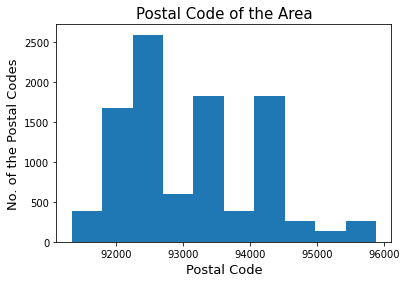

In [0]:
# Histogram of the column Postal_code

autolib_clean['Postal_code'].hist(grid=False)
plt.title("Postal Code of the Area", fontsize = 15)
plt.xlabel("Postal Code", fontsize=13)
plt.ylabel("No. of the Postal Codes",fontsize=13)



Text(0, 0.5, 'No. of the Data Points')

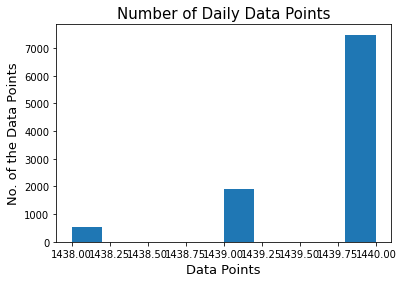

In [0]:
# Histogram of the column n_daily_data_points

autolib_clean['n_daily_data_points'].hist(grid=False)
plt.title("Number of Daily Data Points", fontsize = 15)
plt.xlabel("Data Points", fontsize=13)
plt.ylabel("No. of the Data Points",fontsize=13)

Text(0, 0.5, 'No. of Days')

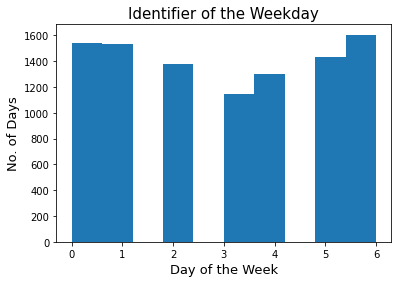

In [0]:
# Histogram of the column dayOfWeek

autolib_clean['dayOfWeek'].hist(grid=False)
plt.title("Identifier of the Weekday", fontsize = 15)
plt.xlabel("Day of the Week", fontsize=13)
plt.ylabel("No. of Days",fontsize=13)

Text(0, 0.5, 'No. of Bluecars')

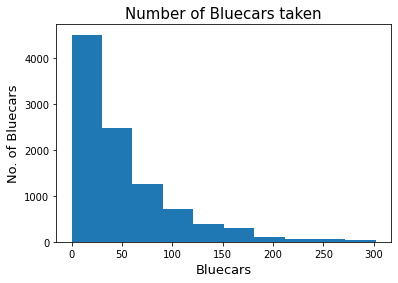

In [0]:
# Histogram of the column BlueCars_taken_sum

autolib_clean['BlueCars_taken_sum'].hist(grid=False)
plt.title("Number of Bluecars taken", fontsize = 15)
plt.xlabel("Bluecars", fontsize=13)
plt.ylabel("No. of Bluecars",fontsize=13)

Text(0, 0.5, 'No. of Bluecars')

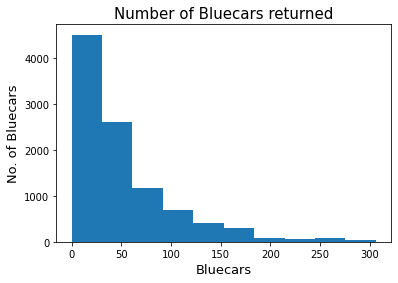

In [0]:
# Histogram of the column BlueCars_returned_sum

autolib_clean['BlueCars_returned_sum'].hist(grid=False)
plt.title("Number of Bluecars returned", fontsize = 15)
plt.xlabel("Bluecars", fontsize=13)
plt.ylabel("No. of Bluecars",fontsize=13)

Text(0, 0.5, 'No. of Slots')

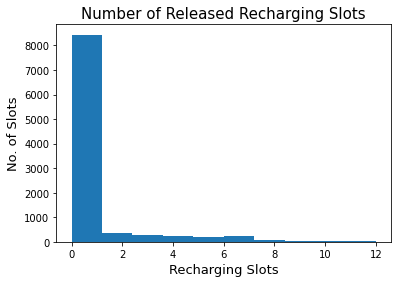

In [0]:
# Histogram of the column Slots_freed_sum

autolib_clean['Slots_freed_sum'].hist(grid=False)
plt.title("Number of Released Recharging Slots", fontsize = 15)
plt.xlabel("Recharging Slots", fontsize=13)
plt.ylabel("No. of Slots",fontsize=13)

Text(0, 0.5, 'No. of Slots')

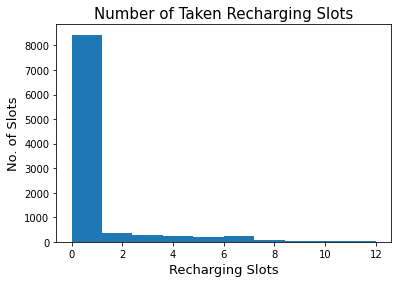

In [0]:
# Histogram of the column Slots_taken_sum

autolib_clean['Slots_taken_sum'].hist(grid=False)
plt.title("Number of Taken Recharging Slots", fontsize = 15)
plt.xlabel("Recharging Slots", fontsize=13)
plt.ylabel("No. of Slots",fontsize=13)

**Conclusion**

From the histograms, we can see that the followng columns are positively skewed.
1. Recharging Slots freed and taken
2. Number of bluecars taken and returned
3. Postal codes

This means that the mean in these columns is greater than the median 

## Bivariate Analysis

In [42]:
# Change categorical data to numerical data in order to do scatter plots and a correlation matrix

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
autolib_clean['date'] = en.fit_transform(autolib_clean['date'])
autolib_clean['day_type'] = en.fit_transform(autolib_clean['day_type'])


autolib_clean

,Unnamed: 0,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,3899,91330,0,1440,0,0,19,9,4,2
1,3900,91330,11,1438,1,0,10,10,0,0
2,3901,91330,19,1439,2,0,11,13,1,1
3,3903,91330,22,1440,4,0,10,6,1,1
4,3905,91330,23,1440,6,1,28,17,4,2
...,...,...,...,...,...,...,...,...,...,...
9931,16079,95880,117,1439,3,0,15,13,0,0
9932,16080,95880,118,1440,4,0,15,10,0,0
9933,16081,95880,119,1440,5,1,19,19,0,0
9934,16082,95880,120,1440,6,1,33,35,0,0


In [0]:
autolib_clean['Postal_code'].value_counts()

94130    130
92350    130
95100    130
92110    130
92190    130
        ... 
93200    103
93260    101
92800     82
93390     72
92100      7
Name: Postal_code, Length: 79, dtype: int64

### Scatter Plots

ValueError: ignored

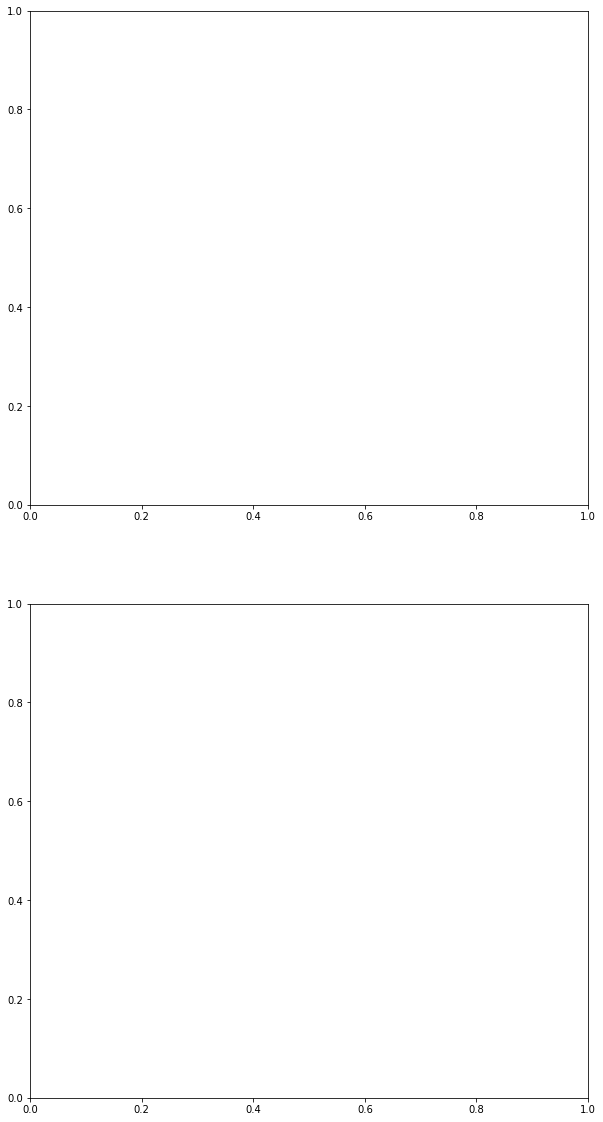

In [0]:
f, axes = plt.subplots(2, 1, figsize=[10, 20])

sns.countplot('Postal_code', hue= 'BlueCars_taken_sum', autolib_clean=autolib_clean, ax=axes[0])
sns.countplot('Postal_code', hue= 'BlueCars_returned_sum', autolib_clean=autolib_clean, ax=axes[1])

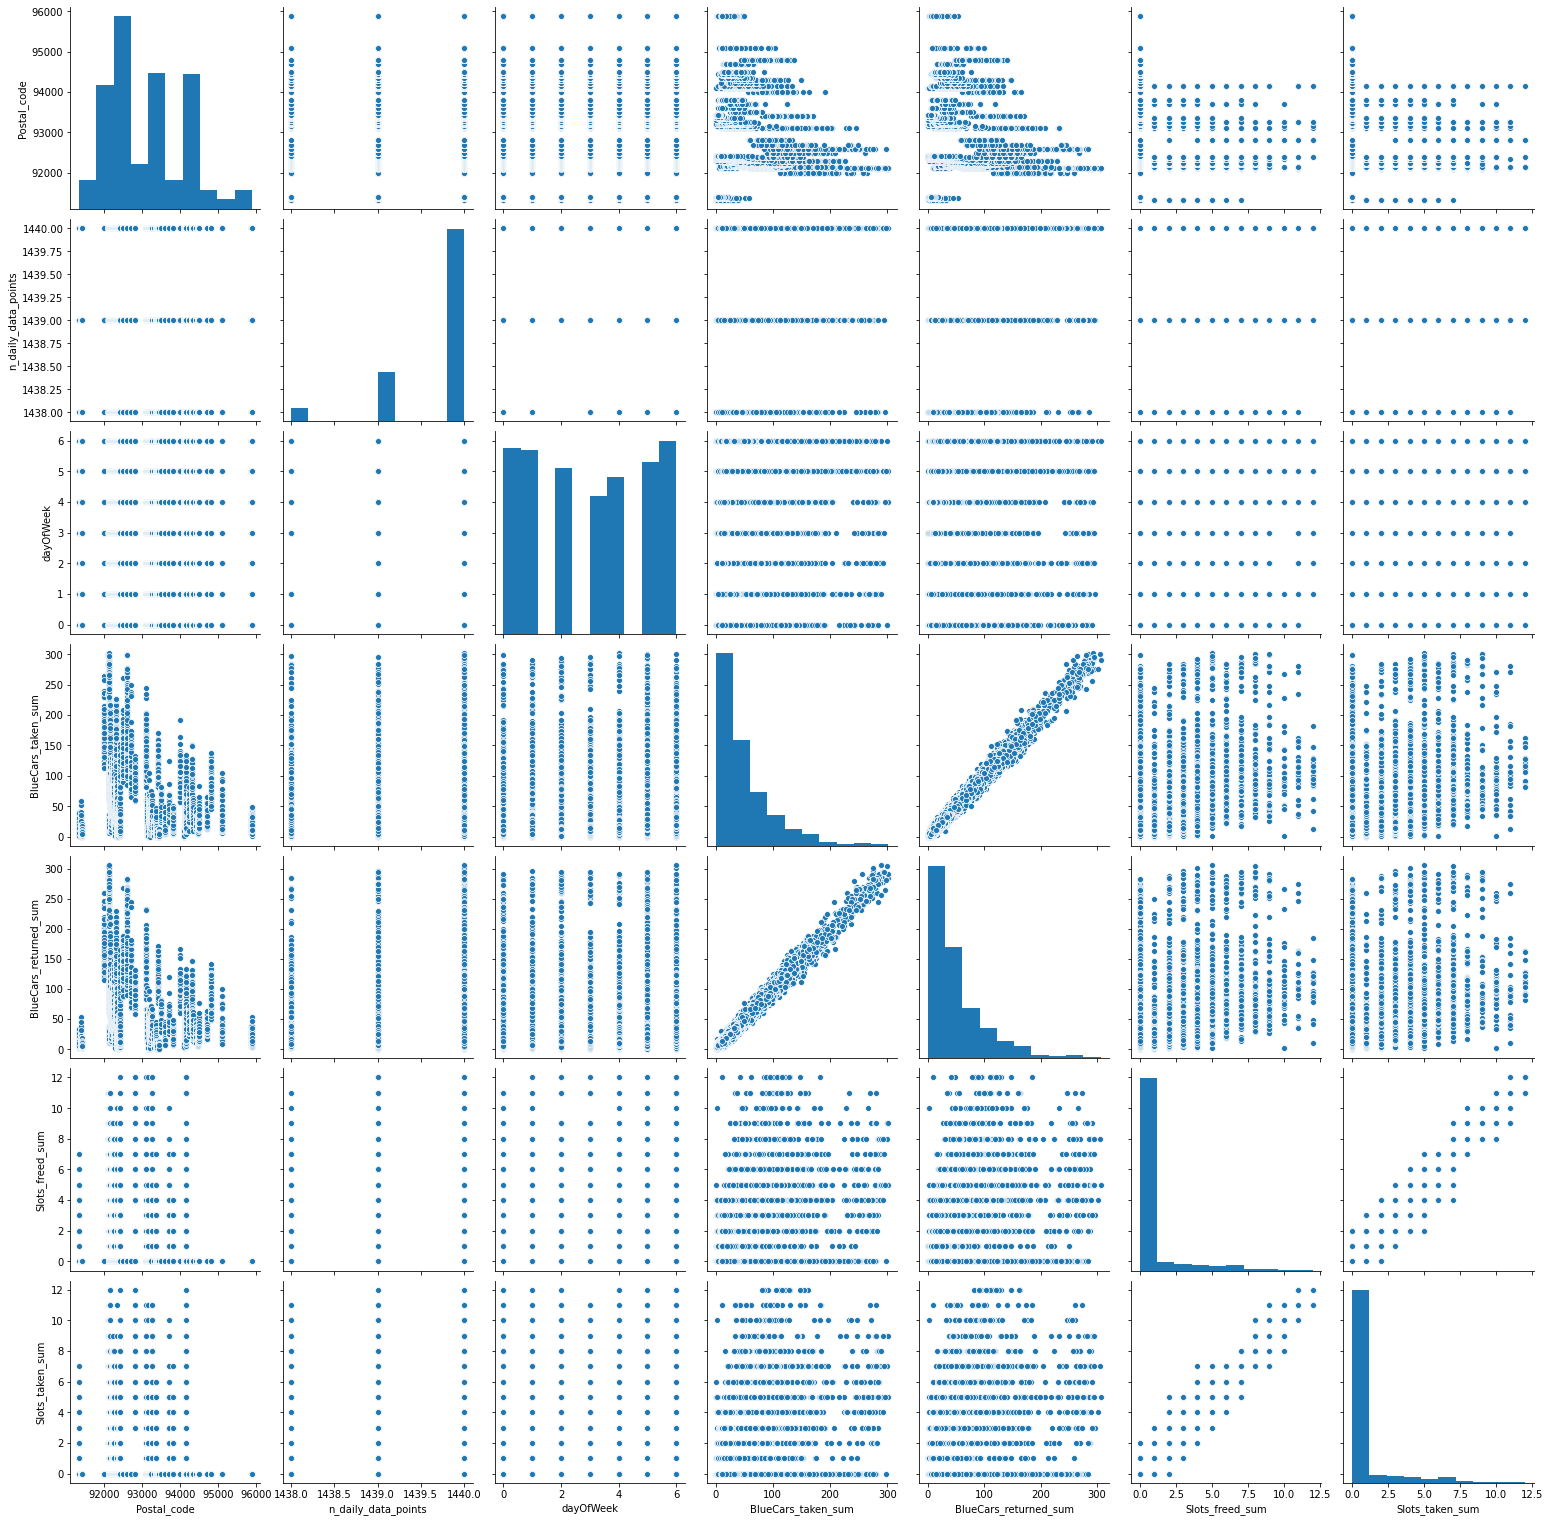

In [0]:
new = autolib_clean.drop(['Unnamed: 0'], axis=1)
sns.pairplot(new, height = 3)
plt.show()

### Correlation

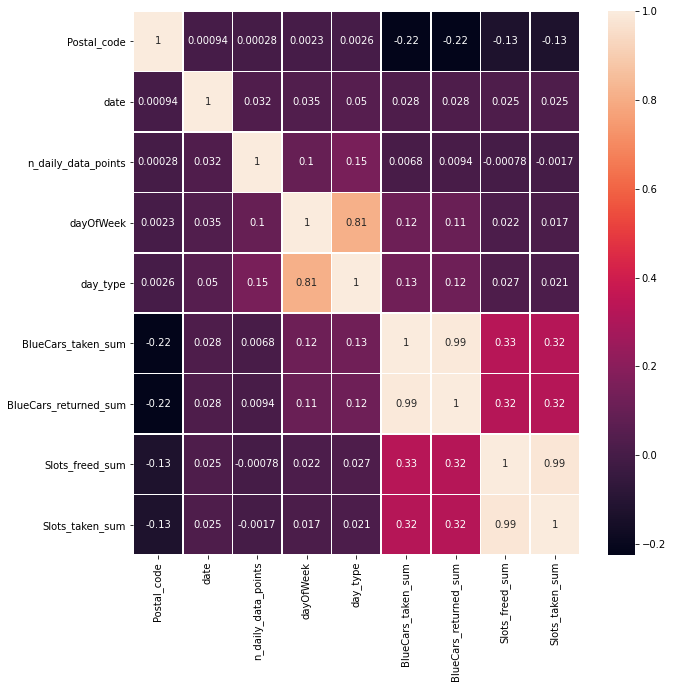

In [0]:
f, ax = plt.subplots(figsize = (10,10))
corr = new.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,  annot=True,  linewidths=.5)

**Conclusion**
From the correlation matrix, the different columns are weakly correlated and thus there is a low likelihood of a relationship

Only day type and day of the week are strongly correlated.

# Hypothesis Testing

I am investigating the claim that the mean number of bluecars taken in different postal codes are significantly different over the weekend has been made.

To do this, I'll use simple random sampling to choose 3 different postal codes that I'll compare. 

My hypothesis statement will be as follows:

H0: the mean number of bluecars taken in different postal codes are similar over the weekend.

H1: the mean number of bluecars in different postal codes are significantly different over the weekend.


In [72]:
# Use simple random sampling to choose 3 different postal codes

filter = autolib_clean['Postal_code'].sample(n = 3, replace="False")
filter

1557    92200
7251    93800
4399    92500
Name: Postal_code, dtype: int64

In [43]:
# Filter the following data from the dataframe
# day_type should be the weekend

typeday = [1]
autolib_clean.day_type.isin(typeday)

0       False
1       False
2       False
3       False
4        True
        ...  
9931    False
9932    False
9933     True
9934     True
9935    False
Name: day_type, Length: 9936, dtype: bool

In [79]:
# The postal codes should be the 3 chosen randomly

code = [92410, 93310, 92340]
autolib_clean.Postal_code.isin(code)


0       False
1       False
2       False
3       False
4       False
        ...  
9931    False
9932    False
9933    False
9934    False
9935    False
Name: Postal_code, Length: 9936, dtype: bool

In [80]:
# Combine the 2 booleans to come up with a filtered dataframe

filtered = autolib_clean[autolib_clean.day_type.isin(typeday) & autolib_clean.Postal_code.isin(code)]
filtered

,Unnamed: 0,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
3238,7959,92340,23,1440,6,1,20,16,0,0
3244,7965,92340,4,1440,5,1,19,22,0,0
3245,7966,92340,5,1440,6,1,17,21,0,0
3251,7972,92340,12,1439,5,1,25,28,0,0
3252,7973,92340,13,1440,6,1,23,21,0,0
...,...,...,...,...,...,...,...,...,...,...
6089,11474,93310,123,1440,6,1,20,20,0,0
6095,11480,93310,129,1440,5,1,1,1,0,0
6096,11481,93310,113,1440,6,1,14,19,0,0
6102,11487,93310,119,1440,5,1,34,29,0,0


In [81]:
filtered['BlueCars_taken_sum'].mean()

18.593220338983052

In [82]:
# Use f-one way test to test the hypothesis. This tells us whether 2 or more groups are similar based on their means and the f-score.

from scipy import stats
filtered_anova = filtered[['Postal_code', 'BlueCars_taken_sum']]
# Choose the unique values appearing in the postal code column
groups = pd.unique(filtered_anova.Postal_code.values)
# iterate over the different postal codes 
new = {a:filtered_anova['BlueCars_taken_sum'][filtered_anova.Postal_code == a] for a in groups}
# perform the one way anova on the 3 postal codes
F, p = stats.f_oneway(new[92410], new[93310], new[92340])

print("p-value is: ", p)
print("F critical value/statistic is:", F)
if p<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")


p-value is:  0.3555526993813896
F critical value/statistic is: 1.0434362731952302
fail to reject null hypothesis


**Conclusion**

Because the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis that the the mean number of bluecars taken in postal codes 92410, 93310 and 92340 are similar over the weekend.

There is not enough evidence to suport the alternative hypothesis that the mean number of bluecars in postal codes 92410, 93310 and 92340 are significantly different over the weekend.
 